In [437]:
import numpy as np
import pandas as pd
import datetime

In [438]:
directory = 'C:/Users/geeze/Documents/finances/utils/legacy/'
file = 'utilities_tidy_507curtis.xlsx'

utils_507 = pd.read_excel(directory + file)

In [439]:
utils_507.head()

,open,close,util,amnt,note,arazin paid,alex paid
0,2013-08-01,2013-08-14,gas,28.5,includes opening fees,1,1
1,2013-08-01,2013-08-28,elec,87.0,NaN,1,1
2,2013-08-15,2013-09-14,internet,60.0,includes opening fees,1,1
3,2013-08-14,2013-09-13,gas,6.0,NaN,1,1
4,2013-08-29,2013-09-13,elec,108.0,NaN,1,1


In [440]:
gas_g = 'gas'
elec_e = 'elec'
inte_i = 'internet'

gas = utils_507['util'] == gas_g
elec = utils_507['util'] == elec_e
inte = utils_507['util'] == inte_i

### Handle gas

In [441]:
g = utils_507.loc[gas]

In [442]:
def ismid (d):
    day = d.day
    
    if day == 1:
        return False
    else:
        return True

In [443]:
def change_to_1 (d):
    mo = d.month
    yr = d.year
    
    d = datetime.datetime(yr,mo,1)
        
    return d

In [444]:
#calculate the values that will be split between the opening month and closing month since billing period straddles a month
mids_to_split = g['open'].apply(ismid)

g.loc[mids_to_split,'split'] = g.loc[mids_to_split,'amnt']/2

C:\Users\geeze\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\geeze\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [445]:
#hack your way to tables that associate the split value with the opening month and closing month
first = g.loc[:,['open', 'split']].dropna().rename(columns={'open':'date'})
sec = g.loc[:,['close', 'split']].dropna().rename(columns={'close':'date'})

In [446]:
#generate a table with the split values associated with the two months the billing period straddles
new_gas = pd.concat([first, sec])
new_gas['date'] = new_gas['date'].apply(change_to_1)
new_gas['util'] = gas_g

#add back the first entry
add = g.loc[0, ['open', 'util', 'amnt']].rename({'open':'date', 'amnt':'split'})
new_gas = new_gas.append(add,ignore_index=True).rename(columns={'split':'amnt'})

In [447]:
new_gas

,date,amnt,util
0,2013-08-01,3.000,gas
1,2013-09-01,3.000,gas
2,2013-10-01,4.500,gas
3,2013-11-01,9.000,gas
4,2013-12-01,6.000,gas
5,2014-01-01,3.000,gas
6,2014-02-01,3.000,gas
7,2014-03-01,2.905,gas
8,2014-04-01,2.385,gas
9,2014-05-01,3.060,gas


### Handle electricity

In [448]:
e = utils_507.loc[elec]

In [449]:
e.head()

,open,close,util,amnt,note,arazin paid,alex paid
1,2013-08-01,2013-08-28,elec,87.0,NaN,1,1
4,2013-08-29,2013-09-13,elec,108.0,NaN,1,1
7,2013-09-26,2013-10-28,elec,33.0,NaN,1,1
10,2013-10-29,2013-11-28,elec,30.0,NaN,1,1
13,2013-11-29,2013-12-28,elec,31.5,NaN,1,1


In [450]:
e['date'] = pd.to_datetime(e.open) + pd.offsets.MonthBegin(0)

C:\Users\geeze\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [451]:
new_e = e.loc[:,['date', 'amnt','util']]

In [452]:
new_e.sort_values(by='date')

,date,amnt,util
1,2013-08-01,87.00,elec
4,2013-09-01,108.00,elec
7,2013-10-01,33.00,elec
10,2013-11-01,30.00,elec
13,2013-12-01,31.50,elec
16,2014-01-01,36.00,elec
19,2014-02-01,51.00,elec
22,2014-03-01,46.50,elec
25,2014-03-01,5.84,elec
29,2014-05-01,72.55,elec


### Handle internet

In [453]:
i = utils_507.loc[inte]

In [454]:
i['split'] = i['amnt']/2


#hack your way to tables that associate the split value with the opening month and closing month
first = i.loc[:,['open', 'split', 'util']].rename(columns={'open':'date'})
sec = i.loc[:,['close', 'split', 'util']].rename(columns={'close':'date'})

C:\Users\geeze\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [455]:
new_i = pd.concat([first, sec])
new_i['date'] = new_i['date'].apply(change_to_1)
new_i = new_i.rename(columns={'split':'amnt'})

In [456]:
new_i

,date,amnt,util
2,2013-08-01,30.000,internet
6,2013-09-01,15.000,internet
9,2013-10-01,15.000,internet
12,2013-11-01,15.000,internet
15,2013-12-01,15.000,internet
18,2014-01-01,15.000,internet
20,2014-02-01,15.000,internet
23,2014-03-01,15.000,internet
26,2014-04-01,14.995,internet
27,2014-05-01,15.000,internet


### stick all together

In [457]:
all_util_outs = pd.concat([new_gas, new_e, new_i])

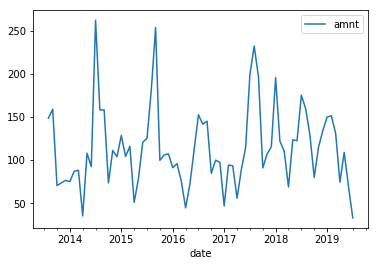

In [460]:
f = all_util_outs.resample('M', on='date').sum()

f.plot()

In [462]:
f.to_csv(directory + '507_utils_monthly.csv')